In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the scraped data
df = pd.read_csv("scraped_products.csv")

# Convert 'Price' to numeric 
df['Price'] = pd.to_numeric(df['Price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')

# Drop rows where Price could not be converted
df = df.dropna(subset=['Price'])

print(df.head(5)) 



 


                                        Product Name     Price  \
0                  AQUAFRESH TOOTHPASTE HERBAL 100ML    3450.0   
1                                    LES PALAIS 75CL   24725.0   
2     Nike Black Sports Shorts with Large White Logo   25000.0   
3                TROP HEAT POTATO CRISPS SALTED 200G    2300.0   
4  Bose – Sport Earbuds True Wireless In-Ear Earbuds  410000.0   

                                                                            Product Link  
0                https://app.isokko.com/shop-item/1460/aquafresh-toothpaste-herbal-100ml  
1                                   https://app.isokko.com/shop-item/852/les-palais-75cl  
2   https://app.isokko.com/shop-item/4282/nike-black-sports-shorts-with-large-white-logo  
3              https://app.isokko.com/shop-item/1534/trop-heat-potato-crisps-salted-200g  
4  https://app.isokko.com/shop-item/4084/bose-sport-earbuds-true-wireless-in-ear-earbuds  


Most expensive product:
Product Name                                         VON COOKER F9S50G2 6G 90*60
Price                                                                   740000.0
Product Link    https://app.isokko.com/shop-item/8718/von-cooker-f9s50g2-6g-9060
Name: 13, dtype: object
Least expensive product:
Product Name                                          TIFFANY CREAM SANDWICH-ORANGE 84G
Price                                                                             805.0
Product Link    https://app.isokko.com/shop-item/1359/tiffany-cream-sandwich-orange-84g
Name: 17, dtype: object
Price Statistics:
count        32.000000
mean      59644.531250
std      151780.952288
min         805.000000
25%        3450.000000
50%        8365.000000
75%       25937.500000
max      740000.000000
Name: Price, dtype: float64


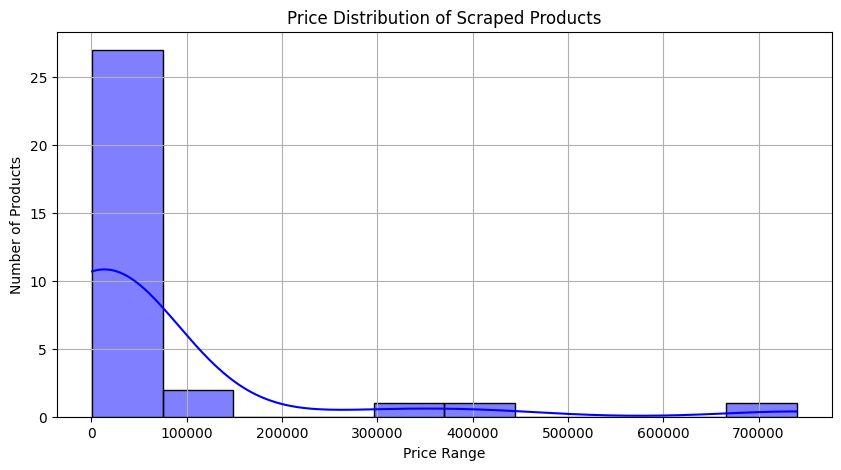

In [37]:


# Load the scraped data
df = pd.read_csv("scraped_products.csv")

# Ensure 'Price' is treated as a string before applying string operations
df['Price'] = df['Price'].astype(str)

# Remove commas and convert 'Price' to numeric
df_cleaned = df[df['Price'].str.replace(',', '').str.isnumeric()].copy()
df_cleaned['Price'] = df_cleaned['Price'].str.replace(',', '').astype(float)

# Basic insights
price_stats = df_cleaned['Price'].describe()
most_expensive = df_cleaned.loc[df_cleaned['Price'].idxmax()]
least_expensive = df_cleaned.loc[df_cleaned['Price'].idxmin()]

print("Most expensive product:")
print(most_expensive)

print("Least expensive product:")
print(least_expensive)

print("Price Statistics:")
print(price_stats)

# Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Price'], bins=10, kde=True, color='blue')
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.title("Price Distribution of Scraped Products")
plt.grid(True)
plt.show()
